In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 


In [31]:
df = pd.read_csv('../data/subdataset_Biro_Daniel.csv')

In [32]:
df.head()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,250,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
2,328,0,164,0,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
3,0,0,264,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
4,0,0,242,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


In [33]:
selected_features = ['OpenPorchSF', 'WoodDeckSF']

In [34]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[selected_features])

In [35]:
from sklearn.cluster import KMeans


inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

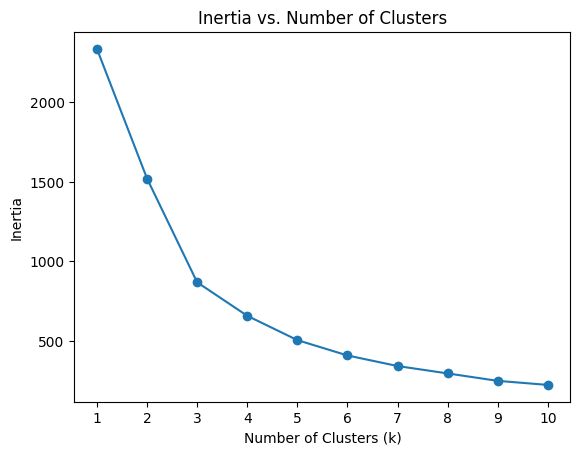

In [36]:
from matplotlib import pyplot as plt


plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

The best k would be around 3, 4 or 5.

In [39]:
df['Cluster'] = KMeans(n_clusters=4, random_state=42).fit_predict(scaled_data)

In [ ]:
cluster_count = df['Cluster'].value_counts()

cluster_stats = df.groupby('Cluster').agg({
  'SalePrice': ['mean', 'median', 'std', 'count'],
  # selected_features: ['mean']
})
cluster_stats

SalePrice                              
                  mean    median           std count
Cluster                                             
0        222384.398058  189000.0  96302.532853   103
1        207246.910345  191000.0  81288.161780   145
2        206720.553977  190000.0  79503.766540   352
3        151763.540493  140000.0  57214.141548   568

In [ ]:
selected_features_mean = df.groupby('Cluster')[selected_features].mean()
selected_features_mean

,OpenPorchSF,WoodDeckSF,SalePrice
Cluster,,,
0,47.262136,395.893204,222384.398058
1,190.510345,54.710345,207246.910345
2,41.196023,171.772727,206720.553977
3,19.216549,5.091549,151763.540493


In [47]:
import plotly.express as px

px.scatter(df, x='OpenPorchSF', y='WoodDeckSF', color='Cluster', title='K-Means Clustering of Houses')

In [48]:
px.box(df, x='Cluster', y='SalePrice', title='Sale Price Distribution by Cluster')

Clustering was performed using K-Means algorithm, and the optimal number of clusters was determined using the elbow method. The clusters were then analyzed based on their average sale prices and other selected features to understand the characteristics of each cluster. Visualizations such as scatter plots and box plots were created to illustrate the clustering results and the distribution of sale prices across different clusters.